# <u>Customer segmentation project - Clustering type

# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
# Converting our csv dataset to pandas dataframe using pandas library
dataset = pd.read_csv(r'C:\Users\Asus\Desktop\ML projects\2 customer Segmentation\Customers_dataset.csv')

In [11]:
#getting some informations about the dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#Displaying the first 10 rows of the dataframe
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
#Displaying the last 10 rows of the dataframe
dataset.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [10]:
# calculating the no of rows and columns present in the dataframe
dataset.shape

(200, 5)

In [12]:
#getting some satistical information from the dataframe(like mean ,median,standard deviation,first quartile,second quartile etc)
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
# checking any null values present in the dataframe
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
#selecting our required independent variable to solve and built the ML model. 
x = dataset.iloc[:,[3,4]].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# Finding the perfect no of clusters required to build the model 

In [20]:
# In this clustering problem I am using K-means clustering algorithm to build the model.
# for doing this we need to find our perfect and required no of clusters.
# to do so , we are using WCSS(within clusters number of squares) formula to find the no of clusters.

# Now creating an empty array to store the clusters values.

arr = []
# using for loop and interating the No Of Clusters to calculate WCSS value.
for i in range(1,21):
    k = KMeans(n_clusters = i, init = "k-means++", random_state = 50)
    k.fit(x)
    arr.append(k.inertia_)
    print(k)



C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=1, random_state=50)
KMeans(n_clusters=2, random_state=50)
KMeans(n_clusters=3, random_state=50)
KMeans(n_clusters=4, random_state=50)
KMeans(n_clusters=5, random_state=50)
KMeans(n_clusters=6, random_state=50)
KMeans(n_clusters=7, random_state=50)
KMeans(random_state=50)
KMeans(n_clusters=9, random_state=50)
KMeans(n_clusters=10, random_state=50)
KMeans(n_clusters=11, random_state=50)
KMeans(n_clusters=12, random_state=50)
KMeans(n_clusters=13, random_state=50)
KMeans(n_clusters=14, random_state=50)
KMeans(n_clusters=15, random_state=50)
KMeans(n_clusters=16, random_state=50)
KMeans(n_clusters=17, random_state=50)
KMeans(n_clusters=18, random_state=50)
KMeans(n_clusters=19, random_state=50)
KMeans(n_clusters=20, random_state=50)


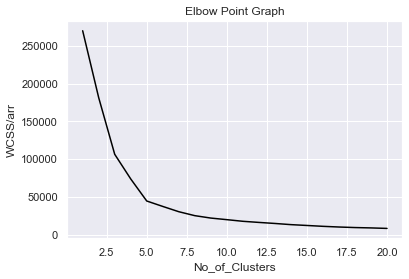

In [22]:
# Now ploting a graph to find the WCSS value which is least with respect to No of clusters.
sns.set()
plt.plot(range(1,21), arr, color="Black")
plt.title('Elbow Point Graph')
plt.xlabel('No_of_Clusters')
plt.ylabel('WCSS/arr')
plt.show()

In [23]:
# from the above graph we can see that there 2 sharp edges and after 5 there is no sharp edge,
# so we can take no of clusters = 5 because at 5 the corresponding WCSS value is least.

In [24]:
# traning the k-means clustering model.
k = KMeans(n_clusters=5, init='k-means++', random_state=0)
y = k.fit_predict(x)
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


# Visualising the clusters in a graph

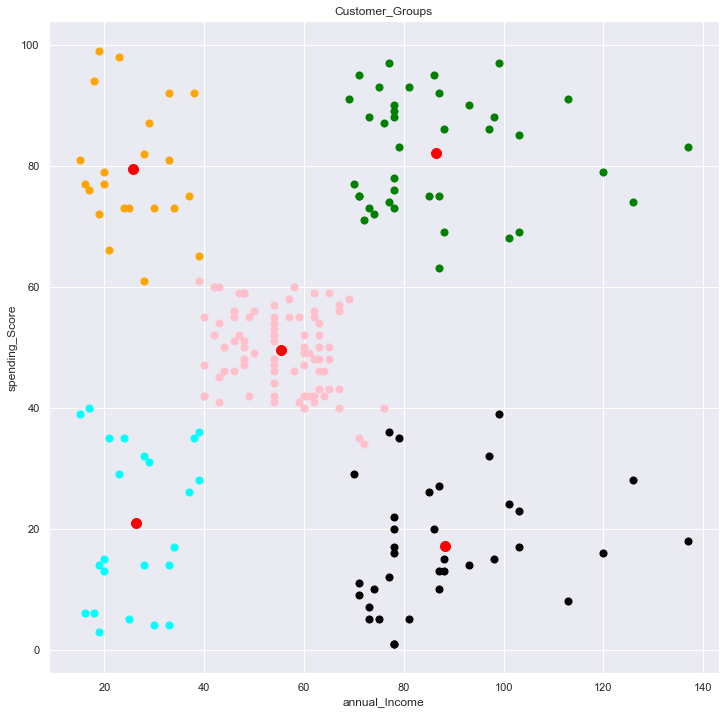

In [27]:
plt.figure(figsize=(12,12))
plt.scatter(x[y==0,0], x[y==0,1], s=50, c='black', label='C1')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='pink', label='C2')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='green', label='C3')
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='orange', label='C4')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='cyan', label='C5')
#plotting the centroids for each clusters
plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], s=100, c='red', label='Centroids')

plt.title('Customer_Groups')
plt.xlabel('annual_Income')
plt.ylabel('spending_Score')
plt.show()

# Conclusion 

In [28]:
# From the above plot we can get some inference listed below:

  #1.a group of peoples with high income and low income has low spending scores.
  #2.a group of peoples with high income and low income has high spending scores.
  #3.a group of peoples with mean salary has medium spending scores.
    
# so this plot will help the shop owners to plan and sell their products to the group 1 peoples to increase the Spending scores.